In [2]:
import sys
sys.path.append("..")

from torch.utils.data import DataLoader
from enformer_pytorch import Enformer, from_pretrained

from MPRA_predict.utils import *
from MPRA_predict.datasets import *

np.set_printoptions(linewidth=120)

In [3]:
pred_list = []
for cropped_length in [256, 1024, 4096, 16384, 65536, 196608]:
    pred = np.load(f'data/Enformer_pred_crop_{cropped_length}.npy')
    pred_list.append(pred)
target = np.load('data/enformer_targets_test_100.npy')
pred_list.append(target)
pred_list = np.stack(pred_list)

print(pred_list.shape)

(7, 100, 2, 5313)


In [8]:
for i in range(len(pred_list)):
    true = target.reshape(-1)
    pred = pred_list[i].reshape(-1)
    mse = mean_squared_error(true, pred)
    print(f'{i}: {mse}')
    r, _ = pearsonr(true, pred)
    print(f'{i}: {r}')
    rho, _ = spearmanr(true, pred)
    print(f'{i}: {rho}')

0: 3.142947196960449
0: 0.39979347326045334
0: 0.5936685571076663
1: 2.729914426803589
1: 0.5191326882142764
1: 0.6413258564142251
2: 2.3516459465026855
2: 0.6019289034350224
2: 0.6678862233347183
3: 1.9376499652862549
3: 0.6860963084587693
3: 0.6843583208300149
4: 1.7674615383148193
4: 0.7192699557784825
4: 0.6981677836211493
5: 1.7948570251464844
5: 0.7136792691989899
5: 0.7009211394945407
6: 0.0
6: 0.9999999999999992
6: 1.0


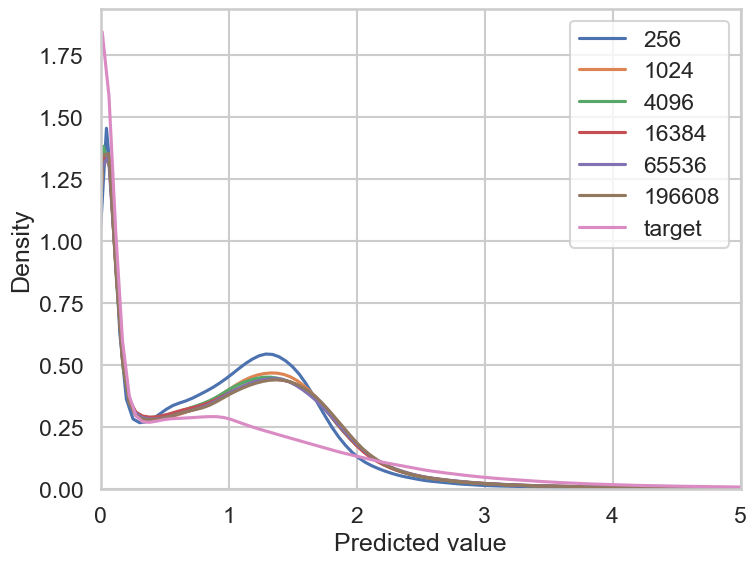

In [11]:
plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.13, bottom=0.13, right=0.93, top=0.93)

labels = [256, 1024, 4096, 16384, 65536, 196608, 'target']

for i in range(len(pred_list)):
    data = pred_list[i].reshape(-1).copy()
    data[data>10] = 10
    # sns.histplot(data, stat='density', bins=100, label=f'{i}')
    sns.kdeplot(data, label=labels[i])
    plt.xlim(0, 5)


plt.xlabel('Predicted value')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/distribution.png', dpi=400)

KeyboardInterrupt: 

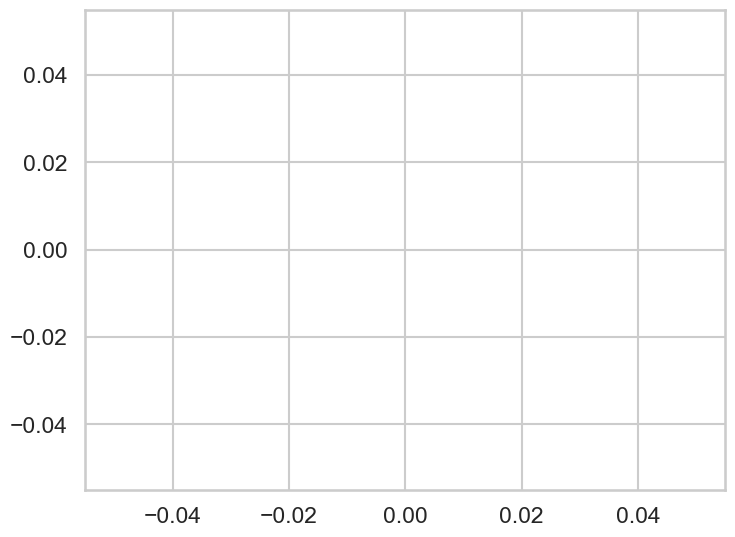

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.13, bottom=0.13, right=0.93, top=0.93)

sns.histplot(pred_list.reshape(pred_list.shape[0], -1), bins=100)



# corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
# sns.lineplot(x=[256, 1024, 4096, 16384, 65536, 196608], y=corr[-1, :-1], marker="o", label='no padding')





# pred_list = []
# for cropped_length in [256, 1024, 4096, 16384, 65536, 196608]:
#     pred = np.load(f'data/Enformer_pred_crop_{cropped_length}_pad_196608.npy')
#     pred_list.append(pred)
# target = np.load('data/enformer_targets_test_100.npy')
# pred_list.append(target)
# pred_list = np.stack(pred_list)

# corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
# sns.lineplot(x=[256, 1024, 4096, 16384, 65536, 196608], y=corr[-1, :-1], marker="o", label='N padding')






# pred_list = []
# for cropped_length in [256, 1024, 4096, 16384, 65536, 196608]:
#     pred = np.load(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_random.npy')
#     pred_list.append(pred)
# pred_list = np.stack(pred_list)

# target = np.load('data/enformer_targets_test_100.npy')
# pred_list = np.concatenate([pred_list, target[None, :]], axis=0)

# corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
# sns.lineplot(x=[256, 1024, 4096, 16384, 65536, 196608], y=corr[-1, :-1], marker="o", label='random padding')








# plt.xscale('log')
# plt.xlim(2**7, 2**19)
# plt.xticks([256, 1024, 4096, 16384, 65536, 196608, 2**18], labels=[256, 1024, 4096, 16384, 65536, 196608, ''])
# plt.xlabel('Valid sequence length')
# plt.yscale('linear')
# plt.ylim(0.2, 0.8)
# plt.ylabel('Pearson correlation')
# plt.legend(fontsize=16, loc='lower right')
# plt.savefig('figures/correlation_between_3_padding_methods.jpg', dpi=400)
# plt.savefig('figures/correlation_between_3_padding_methods.pdf', dpi=400)
# plt.show()

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.13, bottom=0.13, right=0.93, top=0.93)


pred_list = []
for cropped_length in [256, 1024, 4096, 16384, 65536, 196608]:
    pred = np.load(f'data/Enformer_pred_crop_{cropped_length}.npy')
    pred_list.append(pred)
target = np.load('data/enformer_targets_test_100.npy')
pred_list.append(target)
pred_list = np.stack(pred_list)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
sns.lineplot(x=[256, 1024, 4096, 16384, 65536, 196608], y=corr[-1, :-1], marker="o", label='no padding')









plt.xscale('log')
plt.xlim(2**7, 2**19)
plt.xticks([256, 1024, 4096, 16384, 65536, 196608, 2**18], labels=[256, 1024, 4096, 16384, 65536, 196608, ''])
plt.xlabel('Valid sequence length')
plt.yscale('linear')
plt.ylim(0.2, 0.8)
plt.ylabel('Pearson correlation')
plt.legend(fontsize=16, loc='lower right')
plt.savefig('figures/correlation_between_3_padding_methods.jpg', dpi=400)
plt.savefig('figures/correlation_between_3_padding_methods.pdf', dpi=400)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.13, bottom=0.13, right=0.93, top=0.93)




pred_array = []
for cropped_length in [256, 1024, 4096, 16384, 65536, 196608]:
    pred_list = np.load(f'data/Enformer_pred_crop_{cropped_length}_pad_196608_random_10_times.npy')
    pred_average = np.mean(pred_list, axis=0, keepdims=True)
    pred_array.append(pred_list)
pred_array = np.stack(pred_array) # shape = (6, 10, 100, 2, 5313)
print(pred_array.shape)






pred_list = pred_array.reshape(60, 100, 2, 5313)
print(pred_list.shape)
target = np.load('data/enformer_targets_test_100.npy')
print(target.shape)

pred_list = np.concatenate([pred_list, target[None, :]], axis=0)
corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))



x_labels = [x for x in [256, 1024, 4096, 16384, 65536, 196608] for _ in range(10)]
plt.boxplot(corr[-1, :-1].reshape(6, 10).T, positions=[8,10,12,14,16,16+np.log2(3)], widths=0.5)

# sns.stripplot(x=x_labels, y=corr[-1, :-1], color="black", size=5, alpha=0.6, jitter=True)




pred_average_list = pred_array.mean(axis=1) # shape = (6, 100, 2, 5313)
pred_average_list = np.concatenate([pred_average_list, target[None, :]], axis=0)
corr = np.corrcoef(pred_average_list.reshape(pred_average_list.shape[0], -1))
sns.lineplot(x=[8,10,12,14,16,16+np.log2(3)], y=corr[-1, :-1], marker="o", label='average')




plt.xlim(7, 19)
plt.xticks([8,10,12,14,16,16+np.log2(3), 18], labels=[256, 1024, 4096, 16384, 65536, 196608, ''])
plt.ylim(0.2, 0.8)
plt.yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
plt.xlabel('Valid sequence length')
plt.ylabel('Pearson correlation')
plt.legend(fontsize=16, loc='lower right')

# from matplotlib.lines import Line2D
# custom_lines = [Line2D([0], [0], color='blue', lw=2),  # Box color
#                 Line2D([0], [0], color='red', lw=2)]   # Whisker color
# plt.legend(custom_lines, ['Box', 'Whiskers'], loc='upper right')


plt.savefig('figures/correlation_between_random_and_avearge.jpg', dpi=400)
plt.savefig('figures/correlation_between_random_and_avearge.pdf', dpi=400)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 假设相关系数数据
features = ['a1', 'a2', 'a3', 'a4', 'mean']
correlations = [0.85, 0.72, 0.68, 0.75, 0.8]

# 目标值：虚线表示的参考值
reference_value = 0.7

# 条形图
plt.figure(figsize=(10, 6))
plt.bar(features, correlations, color='skyblue', alpha=0.8)

# 添加虚线
plt.axhline(y=reference_value, color='red', linestyle='--', linewidth=1.5, label=f'Reference ({reference_value})')

# 添加标签和图例
plt.xlabel('Features')
plt.ylabel('Correlation with b')
plt.title('Feature Correlations with b')
plt.ylim(0, 1)
plt.legend()  # 显示图例
plt.show()

# 折线图
plt.figure(figsize=(10, 6))
plt.plot(features, correlations, marker='o', linestyle='-', color='orange', label='Correlation')

# 添加虚线
plt.axhline(y=reference_value, color='red', linestyle='--', linewidth=1.5, label=f'Reference ({reference_value})')

# 添加标签和图例
plt.xlabel('Features')
plt.ylabel('Correlation with b')
plt.title('Feature Correlations with b')
plt.ylim(0, 1)
plt.legend()  # 显示图例
plt.grid()
plt.show()


In [ ]:
pred_list = []
for random_seed in range(10):
    pred = np.load(f'data/Enformer_pred_crop_4096_pad_196608_random_{random_seed}.npy')
    pred_list.append(pred)
pred_list = np.stack(pred_list)

pred_average = np.mean(pred_list, axis=0)
pred_list = np.concatenate([pred_list, pred_average[None, :]], axis=0)

target = np.load('data/enformer_targets_test_100.npy')
pred_list = np.concatenate([pred_list, target[None, :]], axis=0)
print(pred_list.shape)

corr = np.corrcoef(pred_list.reshape(pred_list.shape[0], -1))
print(corr)